## Import 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Data Load & Check Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,class3,class4,re_registration,contest_award,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,previous_class_3,previous_class_4,previous_class_5,previous_class_6,previous_class_7,previous_class_8,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,contest_participation,idea_contest,onedayclass_topic,completed
0,TRAIN_000,9,22,"복수 전공 ( 다중전공, 이중전공 포함 )",경제통상학,자연과학,False,대학생,1,4.0,NaN,NaN,아니요,NaN,내국인,에브리타임,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",프로젝트 경험,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,"자연과학, 사회과학",대학원 진학,4.0,팀,2.0,C. 데이터 사이언티스트,컴퓨터활용능력,"ADsP, SQLD, 빅데이터 분석 기사, 태블로 관련 자격증, 구글 애널리스트",A. 금융 / 보험 직무,시니어 (10년차 ~),산업 트렌드 (예시: ChatGPT로 인한 직무 변화),해외 기업 (빅테크),"온, 오프라인 동시",100명 이상의 리스너와 10명 이상의 현직자,다양한 사람들과 만나서 생각을 교류할 수 있기 때문,"구글 딥마인드, 카카오 브레인","M. 전문, 과학 및 기술 서비스업",NaN,NaN,"Python 응용, 데이터 시각화 (Matplotlib, Seaborn 등), 머신...",0
1,TRAIN_001,9,1,"복수 전공 ( 다중전공, 이중전공 포함 )",자연과학,IT(컴퓨터 공학 포함),True,대학생,8,NaN,NaN,NaN,아니요,NaN,내국인,지인 추천,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,사회과학,취업,6.0,팀,3.0,"B. 데이터 분석가, C. 데이터 사이언티스트",없음,"ADsP, SQLD, 빅데이터 분석 기사, 정보처리기사","D. 소프트웨어 개발자, F. PM / 서비스 기획자",주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카라쿠배당토),오프라인,3~50명 내외의 강의 리스너와 1명의 현직자,더 많은 사람들이 있으면 제가 예상하지 못한 질문도 할 수 있다고 생각하기 때문입니다.,제일 기획,"J. 정보통신업, O. 공공 행정, 국방 및 사회보장 행정",NaN,NaN,머신러닝 / 딥러닝 응용,0
2,TRAIN_002,9,27,단일 전공,예체능,NaN,False,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,인스타그램,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",공모전 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,예체능,대학원 진학,8.0,개인,10.0,"B. 데이터 분석가, C. 데이터 사이언티스트, I. 마케터",ADsP,"SQLD, 빅데이터 분석 기사, 정보처리기사","A. 금융 / 보험 직무, B. 기획 / 전략 / 경영 직무, H. 마케터 / 영업관리",주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 적으면 서로 부담스러울 수 있을 것 같지만 너무 많으면 너무 피상적인 ...,Lg전자,"C. 제조업, K. 금융 및 보험업, R. 예술, 스포츠 및 여가관련 서비스업",NaN,NaN,"머신러닝 / 딥러닝 응용, SQL 응용, 웹 크롤링",0
3,TRAIN_003,9,1,"복수 전공 ( 다중전공, 이중전공 포함 )",사회과학,IT(컴퓨터 공학 포함),False,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,법학,취업,8.0,팀,2.0,"B. 데이터 분석가, C. 데이터 사이언티스트","SQLD, 정보처리기사","ADsP, 빅데이터 분석 기사",A. 금융 / 보험 직무,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카라쿠배당토),"온, 오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많은 인원이 강의하면 루즈해질 것 같아서,네이버,"J. 정보통신업, K. 금융 및 보험업",NaN,NaN,머신러닝 / 딥러닝 응용,1
4,TRAIN_004,9,16,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),True,대학생,8,NaN,NaN,NaN,아니요,NaN,내국인,지인 추천,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",공모전 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,"IT (컴퓨터 공학 포함), 인문학",취업,7.0,팀,2.0,B. 데이터 분석가,ADsP,"SQLD, 정보처리기사, 태블로 관련 자격증, 구글 애널리스트","A. 금융 / 보험 직무, B. 기획 / 전략 / 경영 직무, F. PM / 서비스...",주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),"국내 대기업 IT 계열 (금융, 제조 ...)","온, 오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,다양한 사람들에게 기회가 있으면 좋겠습니다.,네이버,"K. 금융 및 보험업, M. 전문, 과학 및 기술 서비스업, R. 예술, 스포츠 및...",NaN,NaN,"머신러닝 / 딥러닝 응용, SQL 응용, 웹 크롤링",0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               748 non-null    object 
 1   generation                       748 non-null    int64  
 2   school1                          748 non-null    int64  
 3   major type                       726 non-null    object 
 4   major1_1                         728 non-null    object 
 5   major1_2                         309 non-null    object 
 6   major_data                       748 non-null    bool   
 7   job                              748 non-null    object 
 8   class1                           748 non-null    int64  
 9   class2                           169 non-null    float64
 10  class3                           14 non-null     float64
 11  class4                           1 non-null      float64
 12  re_registration       

## Pre-Processing

In [4]:
missing_ratio = train.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.8].index.tolist()

train = train.drop(columns=columns_to_drop, axis=1)
test = test.drop(columns=columns_to_drop, axis=1)

train.head(2)

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,re_registration,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,onedayclass_topic,completed
0,TRAIN_000,9,22,"복수 전공 ( 다중전공, 이중전공 포함 )",경제통상학,자연과학,False,대학생,1,4.0,아니요,내국인,에브리타임,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",프로젝트 경험,네. 온라인으로 참여하고 싶어요,"자연과학, 사회과학",대학원 진학,4.0,팀,2.0,C. 데이터 사이언티스트,컴퓨터활용능력,"ADsP, SQLD, 빅데이터 분석 기사, 태블로 관련 자격증, 구글 애널리스트",A. 금융 / 보험 직무,시니어 (10년차 ~),산업 트렌드 (예시: ChatGPT로 인한 직무 변화),해외 기업 (빅테크),"온, 오프라인 동시",100명 이상의 리스너와 10명 이상의 현직자,다양한 사람들과 만나서 생각을 교류할 수 있기 때문,"구글 딥마인드, 카카오 브레인","M. 전문, 과학 및 기술 서비스업","Python 응용, 데이터 시각화 (Matplotlib, Seaborn 등), 머신...",0
1,TRAIN_001,9,1,"복수 전공 ( 다중전공, 이중전공 포함 )",자연과학,IT(컴퓨터 공학 포함),True,대학생,8,NaN,아니요,내국인,지인 추천,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,사회과학,취업,6.0,팀,3.0,"B. 데이터 분석가, C. 데이터 사이언티스트",없음,"ADsP, SQLD, 빅데이터 분석 기사, 정보처리기사","D. 소프트웨어 개발자, F. PM / 서비스 기획자",주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카라쿠배당토),오프라인,3~50명 내외의 강의 리스너와 1명의 현직자,더 많은 사람들이 있으면 제가 예상하지 못한 질문도 할 수 있다고 생각하기 때문입니다.,제일 기획,"J. 정보통신업, O. 공공 행정, 국방 및 사회보장 행정",머신러닝 / 딥러닝 응용,0


In [5]:
missing_cols = train.columns[train.isnull().any()].tolist()

for col in missing_cols:
    mode_value = train[col].mode()[0]
    train[col] = train[col].fillna(mode_value)
    test[col] = test[col].fillna(mode_value)

In [6]:
train['is_major_it'] = train['major_field'].str.contains('IT', regex=True).astype(int)
test['is_major_it'] = test['major_field'].str.contains('IT', regex=True).astype(int)

In [7]:
object_columns = train.select_dtypes(['object', 'bool']).columns

label_encoders = {}
for col in object_columns:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    le = LabelEncoder()
    le = le.fit(train[col])
    train[col] = le.transform(train[col])
    
    for label in np.unique(test[col]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    
    test[col] = le.transform(test[col])
    label_encoders[col] = le

## EDA

<AxesSubplot:>

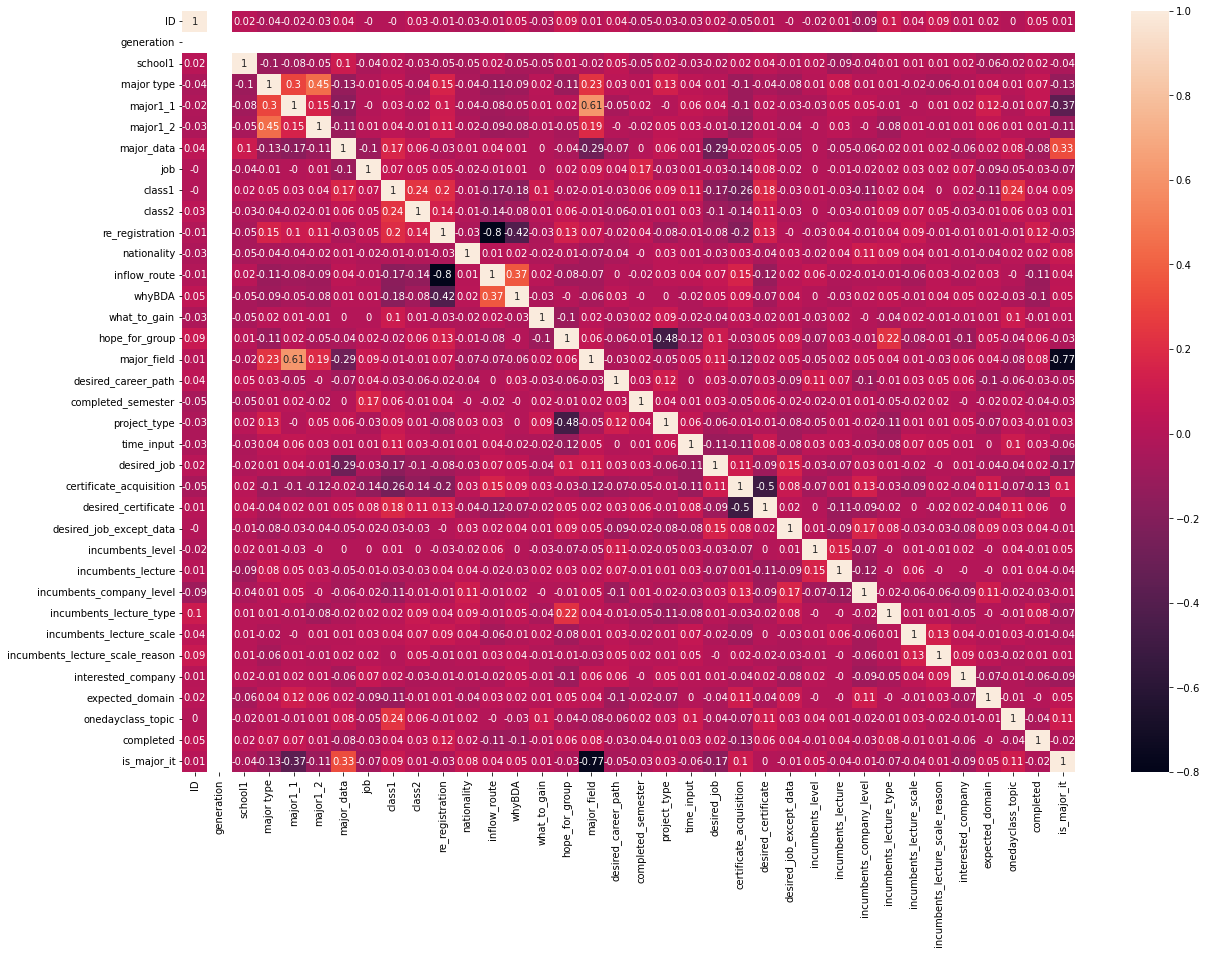

In [8]:
plt.figure(figsize=(20,14))
sns.heatmap(train.corr().round(2), annot = True)

## Feature Selection

In [9]:
X_train = train[['class1', 're_registration', 'inflow_route', 'time_input','is_major_it']]
y_train = train['completed']

X_test = test[['class1', 're_registration', 'inflow_route', 'time_input','is_major_it']]

## Modeling

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Inference

In [11]:
pred = model.predict(X_test)

## Submission

In [12]:
submission = pd.read_csv('sample_submission.csv')
submission['completed'] = pred
submission.to_csv('submit.csv', index = False)